# S03T02 Visualización gráfica de Multiples variables

# *Nivel 1*

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import joypy

In [ ]:
#Importación del dataset
df = pd.read_csv('tips.csv')

## *Observación de los datos*

In [121]:

df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [122]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [123]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [124]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## *Visualización de una variable*

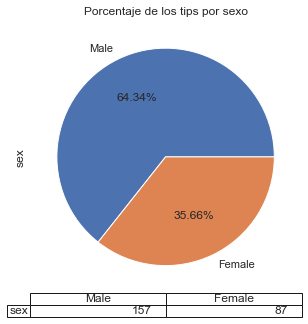

In [125]:
# Grafico con matplotlib


plt.figure(figsize =(5, 5))

df['sex'].value_counts().plot(kind='pie', autopct= '%.2f%%', title = 'Porcentaje de los tips por sexo', table= True)
plt.show()

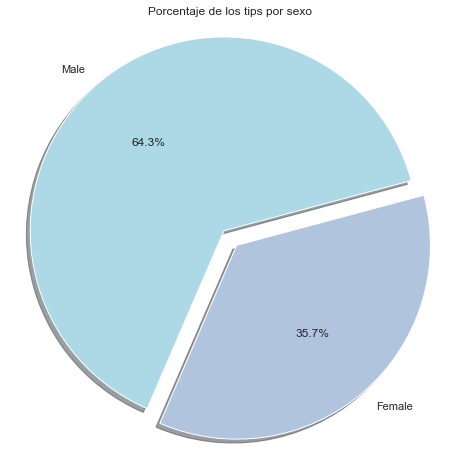

In [126]:
# Grafico con matplotlib (2)


#Tasks = df['sex'].value_counts()
plt.figure(figsize =(8, 8))
my_labels = 'Male','Female'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(df['sex'].value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=15, 
        shadow = True, colors=my_colors, explode=my_explode)
plt.title('Porcentaje de los tips por sexo')
plt.axis('equal')  # revisar que hace esta función
plt.show()


Se observa que más de la mitad (un 64,3%) de las propinas han sido dadas por hombre.

## *Visualización de una variable categórica y una  numérica*


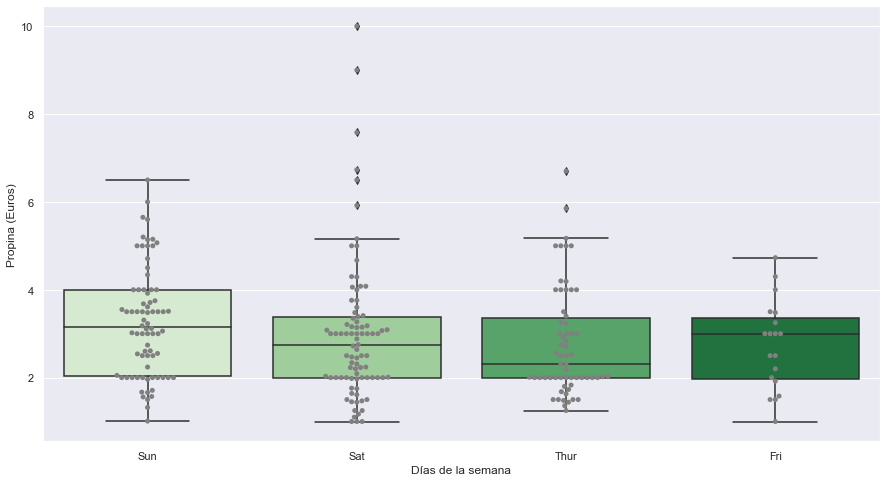

In [127]:

sns.set(style="darkgrid")
plt.figure(figsize =(15, 8))
#my_labels = 'Propina','Día de la semana'

# Usual boxplot
ax = sns.boxplot(x='day', y='tip', data=df, palette="Greens")
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(x=df['day'], y=df['tip'], data=df, color="grey")

plt.xlabel('Días de la semana')
plt.ylabel('Propina (Euros)')
plt.show()

El gráfico muestra que las propinas de concentran entre el sábado y el domingo. 

Siendo el domingo el día en que el importe medio de la propina es superior al resto de días.

Cabe destacar que , el siendo el viernes el día que menos propinas se deja, el importe medio de las propinas es similar a la del domingo.

## *Visualización de dos variables numéricas y una categorica*


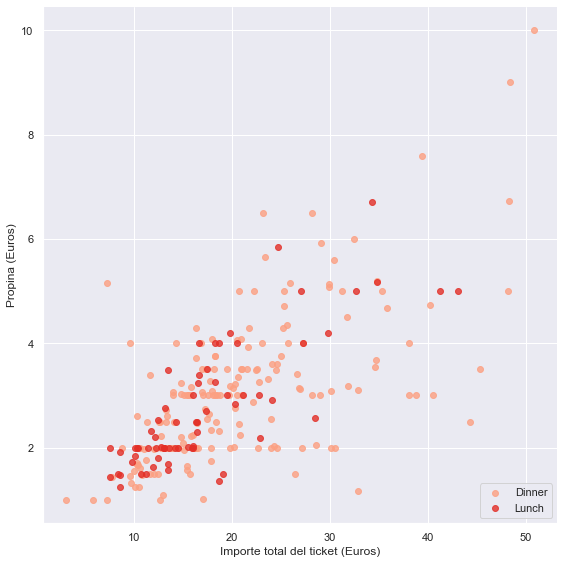

In [128]:

sns.lmplot( x="total_bill", y="tip", data=df, fit_reg=False, hue='time',palette="Reds", height=8,legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.xlabel('Importe total del ticket (Euros)')
plt.ylabel('Propina (Euros)')

plt.show()

Según el gráfico, podemos determinar que hay una relación directa entre el importe total del ticket y el importe de la propina.
También podemos decir que la propinas más elevadas se dejan sobretodo durante las cenas.

## *Visualización de una variable categórica y una  numérica*


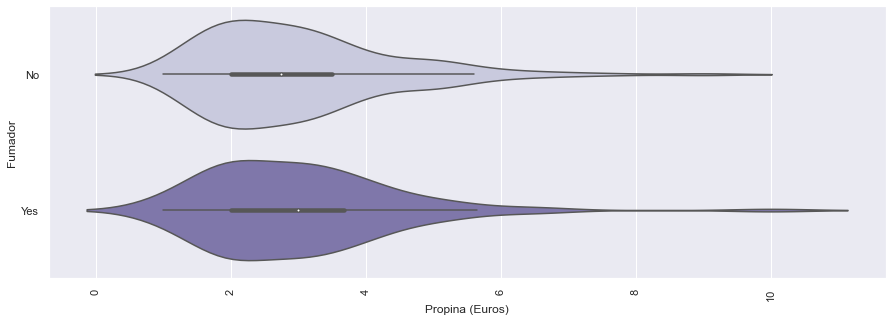

In [129]:
plt.figure(figsize =(15, 5))
sns.violinplot(  x=df["tip"], y=df["smoker"], scale='area', palette="Purples")
plt.xlabel("Propina (Euros)")
plt.ylabel("Fumador")
plt.xticks(rotation='vertical')

plt.show()

No se observa una relación significativa entre el importe de la propipa con la condición de ser fumador. Siendo ligeramente superior el importe medio en el caso de los fumadores.